<a href="https://colab.research.google.com/github/tanyavijj/Tanya-project/blob/main/dl_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import numpy as np

# Task 1: SRGAN Model

def build_srgan_generator():
    input_img = layers.Input(shape=(24, 24, 3))  # Low-resolution image (24x24x3)

    # Initial Conv Layer
    x = layers.Conv2D(64, (3, 3), padding='same')(input_img)
    x = layers.PReLU()(x)




In [ ]:
#  residual blocks
    for _ in range(16):
        x_shortcut = x
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.PReLU()(x)
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.add([x_shortcut, x])

In [ ]:
# Upsampling and convolution for high-resolution output
    x = layers.UpSampling2D(size=(2, 2))(x)
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.PReLU()(x)

    x = layers.UpSampling2D(size=(2, 2))(x)
    x = layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

    return Model(input_img, x)

In [2]:
# Task 2: Enhanced SRGAN (ESRGAN-style with RRDB blocks)

def build_enhanced_srgan_generator():
    input_img = layers.Input(shape=(24, 24, 3))  # Low-resolution image (24x24x3)

    # First Conv Layer
    x = layers.Conv2D(64, (3, 3), padding='same')(input_img)
    x = layers.PReLU()(x)





In [ ]:
    # Enhanced Residual Blocks (RRDB-style)
    for _ in range(16):
        x_shortcut = x
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.PReLU()(x)
        x = layers.Conv2D(64, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.add([x_shortcut, x])

In [ ]:
    # Upsampling and final Conv for high-res output
    x = layers.UpSampling2D(size=(2, 2))(x)
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.PReLU()(x)

    x = layers.UpSampling2D(size=(2, 2))(x)
    x = layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

    return Model(input_img, x)

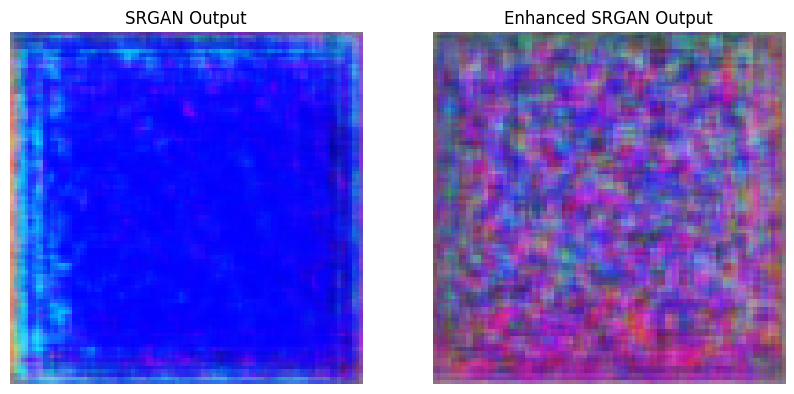

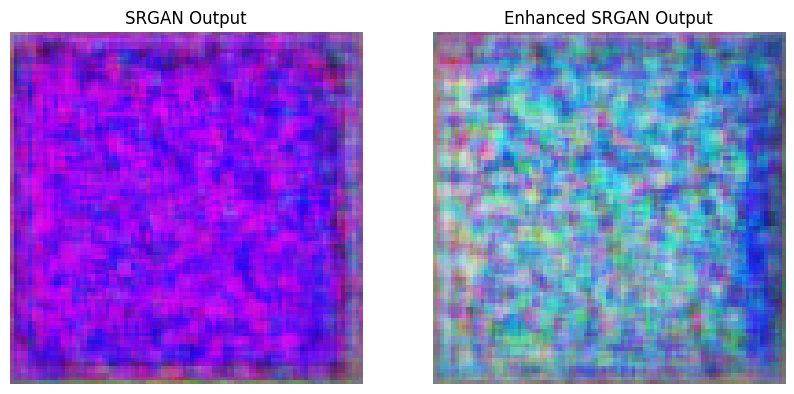

In [4]:
# Build and compile SRGAN model
srgan_generator = build_srgan_generator()
srgan_generator.compile(optimizer='adam', loss='mse')



# Built and compile Enhanced SRGAN model
enhanced_srgan_generator = build_enhanced_srgan_generator()
enhanced_srgan_generator.compile(optimizer='adam', loss='mse')

# test image (low-resolution image)
test_image = np.random.random((1, 24, 24, 3))

# Generate images using both models
srgan_output = srgan_generator(test_image)
enhanced_output = enhanced_srgan_generator(test_image)

# Converted them to numpy arrays for display
srgan_output = srgan_output.numpy().squeeze()
enhanced_output = enhanced_output.numpy().squeeze()

# Plot the comparison
plt.figure(figsize=(10, 5))

# SRGAN output (on the left)
plt.subplot(1, 2, 1)
plt.imshow(srgan_output)
plt.title('SRGAN Output')
plt.axis('off')

# Enhanced SRGAN output (on the right)
plt.subplot(1, 2, 2)
plt.imshow(enhanced_output)
plt.title('Enhanced SRGAN Output')
plt.axis('off')

# Show the images side by side
plt.show()
